# importing modules 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# Load the data into a pandas DataFrame

In [2]:
data = pd.read_csv('Stroke prediction.csv') 

# Exploratory Data Analysis (EDA)

## Plot the distribution of stroke cases

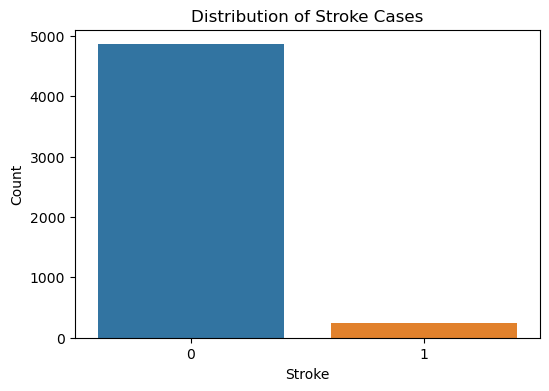

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke Cases')
plt.show()

#  Preprocessing

## Drop unnecessary columns

In [4]:
data = data.drop(['id'], axis=1) 

# Handle missing values

In [5]:
data['bmi'] = data['bmi'].replace('N/A', np.nan)
data['bmi'] = data['bmi'].astype(float)
data['bmi'] = data['bmi'].fillna(data['bmi'].mean()) 

# Encode categorical variables

In [6]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status']) 

# Split the data into features and target variable

In [7]:
X = data.drop(['stroke'], axis=1)
y = data['stroke'] 

# Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Scale the features

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

# Model Training and Evaluation

## Logistic Regression

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluation

In [12]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression:
Accuracy: 0.9393346379647749
Confusion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [13]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.9393346379647749
Confusion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



#  Additional Plots

## Age and Glucose Level Distribution

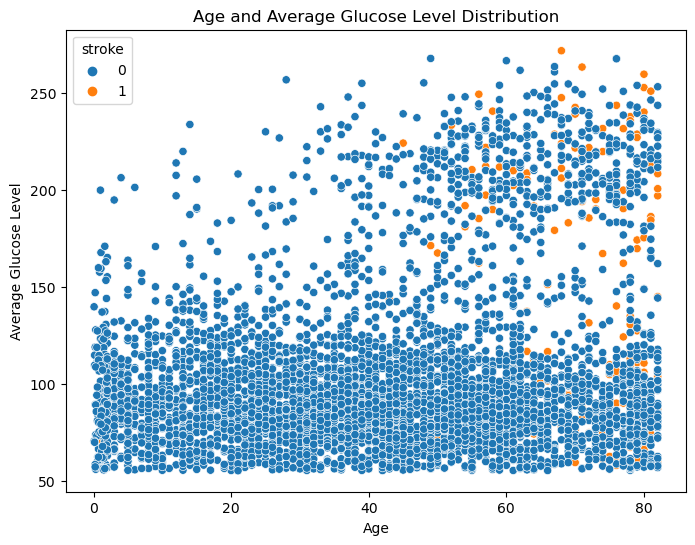

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='avg_glucose_level', hue='stroke')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Age and Average Glucose Level Distribution')
plt.show() 

# BMI Distribution

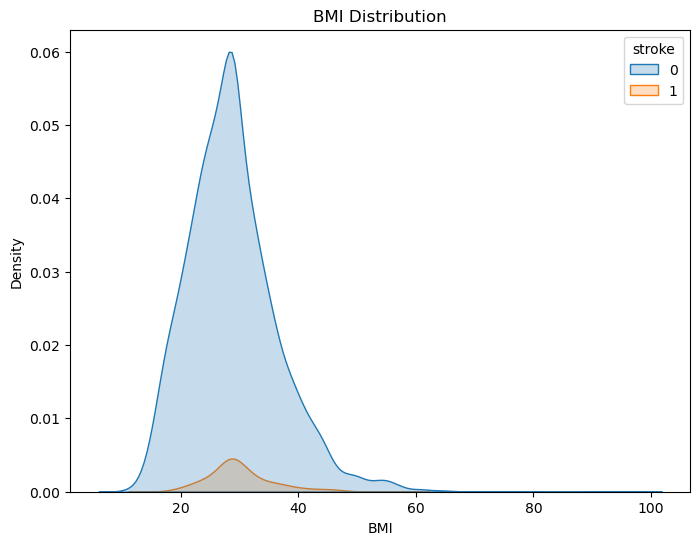

In [15]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='bmi', hue='stroke', fill=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Distribution')
plt.show() 

#  Hypertension and Heart Disease Comparison

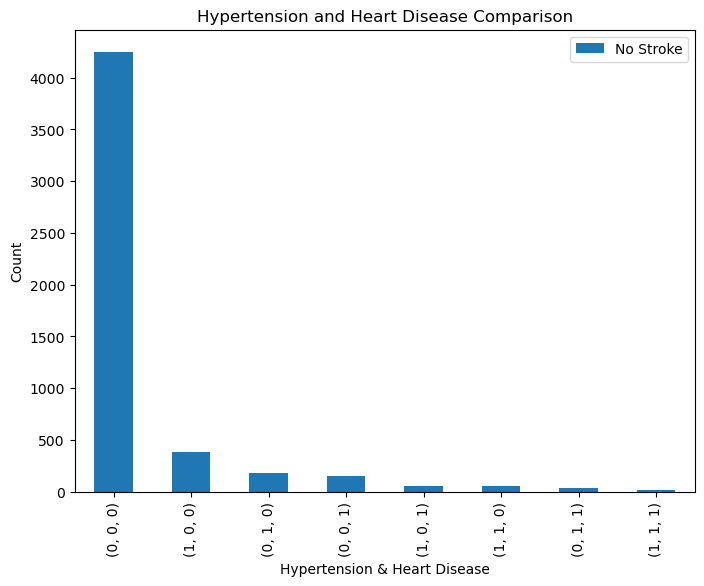

In [16]:
plt.figure(figsize=(8, 6))
data[['hypertension', 'heart_disease', 'stroke']].value_counts().plot(kind='bar', stacked=True)
plt.xlabel('Hypertension & Heart Disease')
plt.ylabel('Count')
plt.title('Hypertension and Heart Disease Comparison')
plt.legend(['No Stroke', 'Stroke'])
plt.show() 

#  Smoking Status Analysis

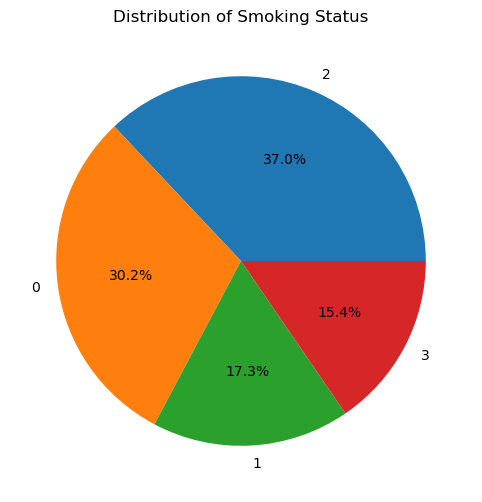

In [17]:
plt.figure(figsize=(8, 6))
data['smoking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Smoking Status')
plt.ylabel('')
plt.show()

# Correlation Heatmap

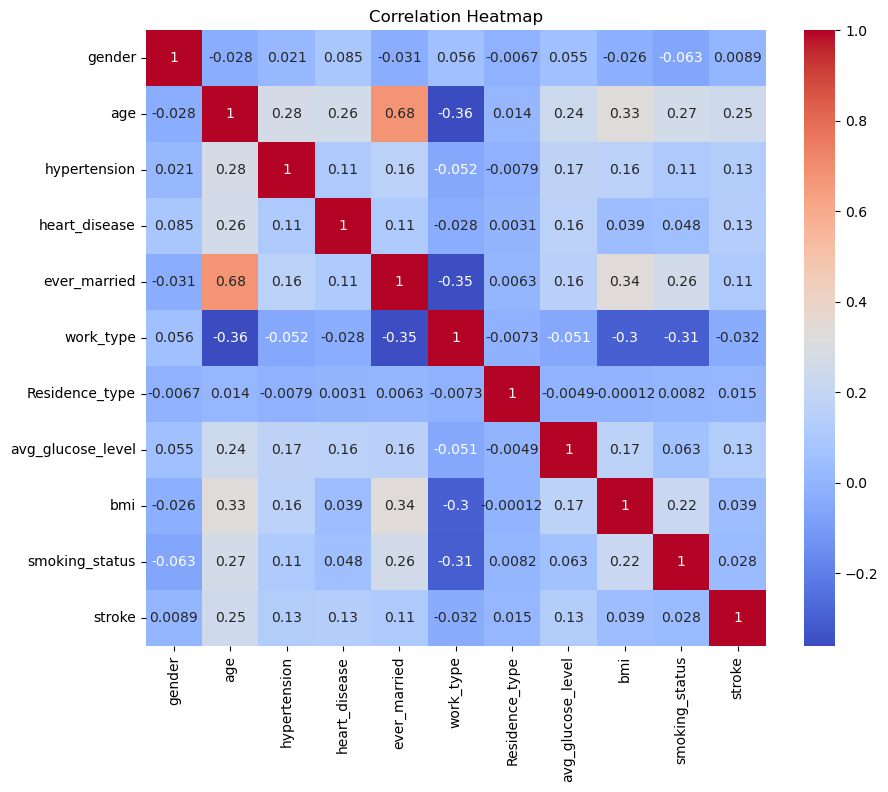

In [18]:
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show() 